In [1]:
from glob import glob
import json
import pandas as pd
import cufflinks as cf
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import statsmodels
import sqlite3
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
jsonFiles = [open(f).read() for f in glob('results-json/*')]

In [3]:
parsedFiles = [json.loads(jsonFile) for jsonFile in jsonFiles]

In [4]:
len(parsedFiles[0])

36

In [5]:
allData = {}
for fileData in parsedFiles:
    for bookData in fileData: 
        colorData = {itemDict['colorWord']: itemDict['nMatches'] for itemDict in bookData[0]['statsList']}
        allData[bookData[0]['textName']] = colorData                                        

In [6]:
df = pd.DataFrame(allData)

In [7]:
df = df.T.sort_index()

Make sure there is only one text per year. 

In [8]:
df.index

Index(['1880-DoraThorne-2374', '1880-GreeneFerneFarm-37046',
       '1880-JezebelsDaughter-3633', '1880-RoundAboutaGreatEstate-20528',
       '1880-ShakespearesInsomniaandtheCausesThereof-11990',
       '1880-StudiesinSongACenturyofRoundelsSonnetson-18782',
       '1880-TheDukesChildren-3622', '1880-TheKasîdahofHâjîAbdûElYezdî-6036',
       '1880-TheMillontheFloss-6688', '1880-TheTrumpetMajor-2864',
       ...
       '1922412-TheRustleofSilk-35079', '192251-MenofAffairs-23757',
       '1922710-AffairinAraby-10551', '1924-OurElizabethAHumourNovel-18430',
       '1925-StolenIdols-45636', '1925-TheVerseBookofaHomelyWoman-3477',
       '192511-ModernBritishPoetry-26785', '192711-OliverCromwellAPlay-17091',
       '1928-BrowningsShorterPoems-16376', '1928-TheBrotherofDaphne-748'],
      dtype='object', length=796)

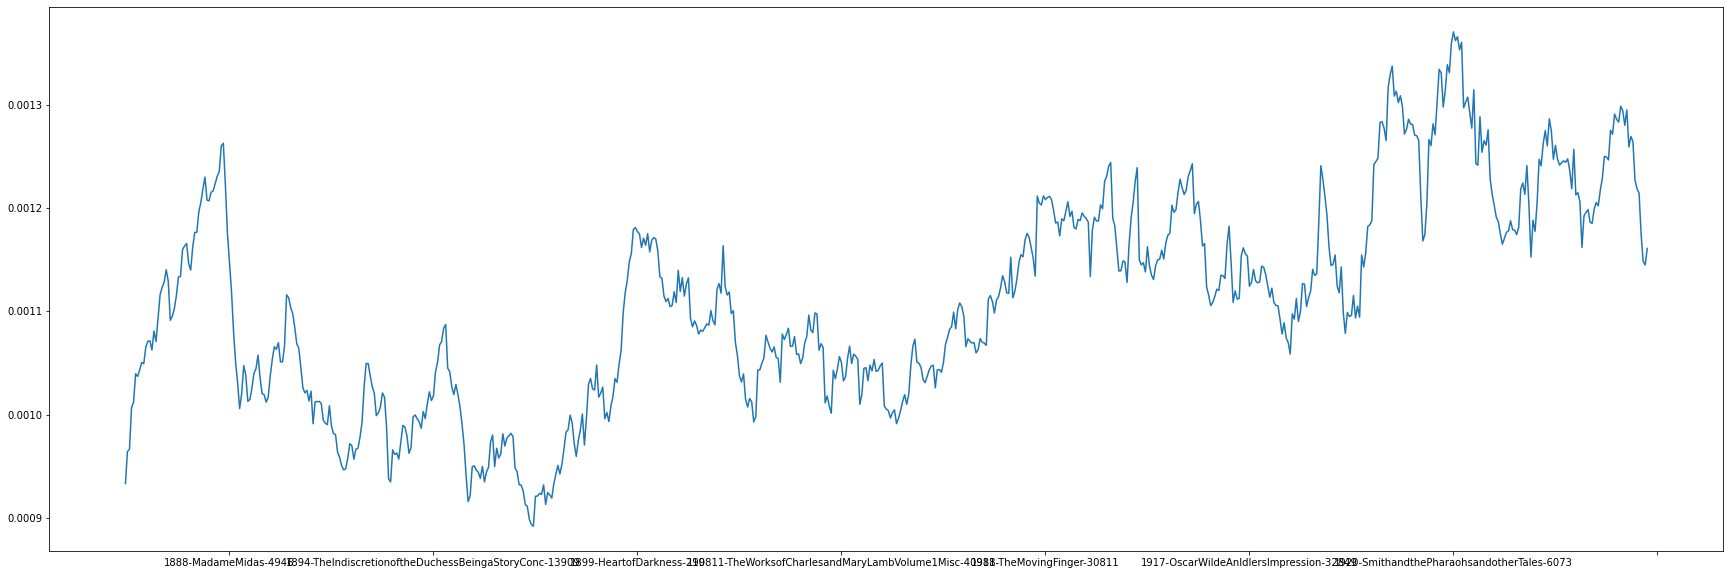

In [9]:
df.sum(axis=1).rolling(50).mean().plot(figsize=(30,10))

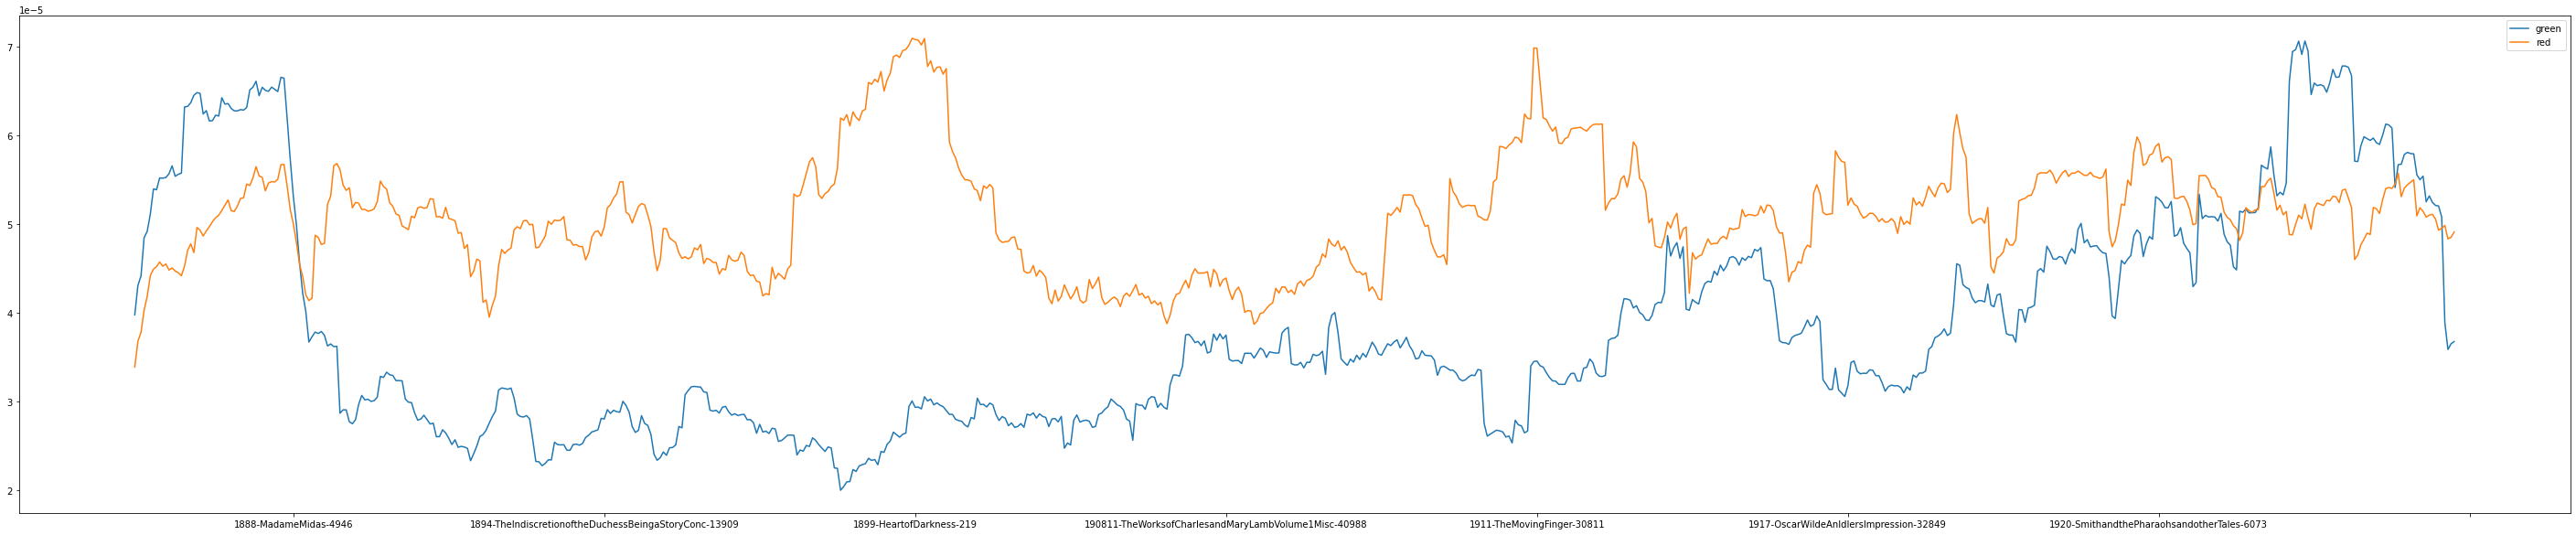

In [10]:
df.fillna(0)[['green', 'red']].rolling(50).mean().plot(figsize=(50, 10))

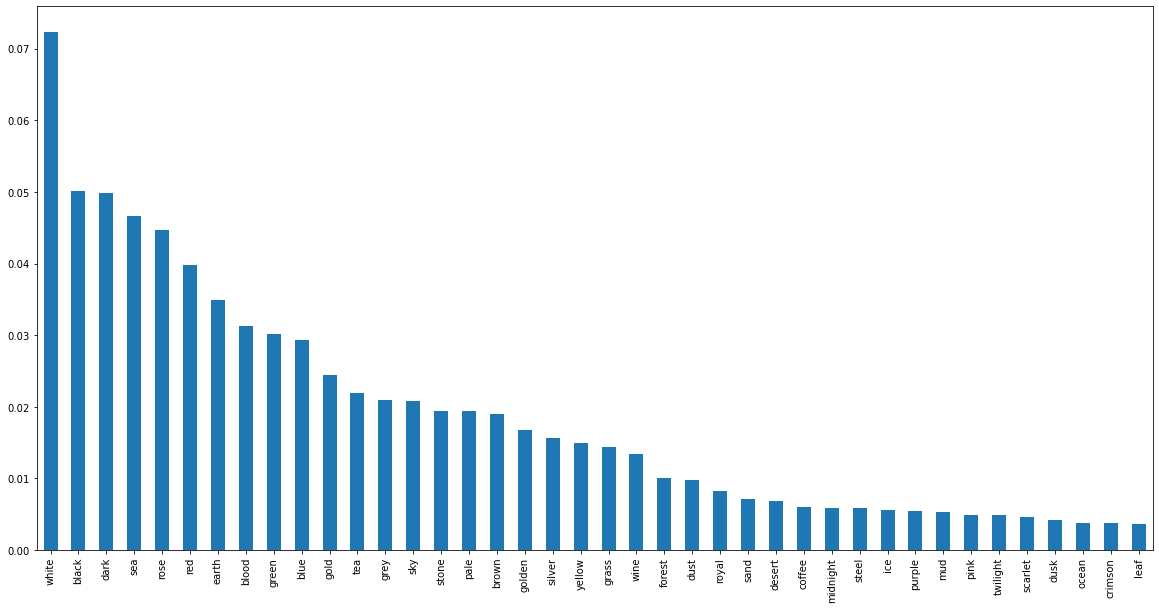

In [11]:
df.sum().sort_values(ascending=False)[:40].plot(kind='bar', figsize=(20, 10))

In [12]:
df.sum(axis=1).sort_values(ascending=False).tail(20)

1897-IreneIddesleigh-34181                              0.000301
1882-KeptintheDark-22000                                0.000299
1898-JournalismforWomenAPracticalGuide-8405             0.000284
1891-NewGrubStreet-1709                                 0.000278
1891-BorninExile-4526                                   0.000275
1885-ThePayingGuest-4298                                0.000268
1887-TheTablesTurnedorNupkinsAwakenedASociali-16897     0.000255
1896-AWomanIntervenes-9379                              0.000254
1909-AnImperialMarriage-40800                           0.000243
1880-TheDukesChildren-3622                              0.000241
188511-TheRealShelleyNewViewsofthePoetsLifeVol-41748    0.000227
191657-HilaireBelloctheManandHisWork-27585              0.000226
1881-AyalasAngel-33500                                  0.000218
1882-MarionFayANovel-30100                              0.000212
1888-TheLegacyofCain-1975                               0.000198
18831231-AnAutobiographyo

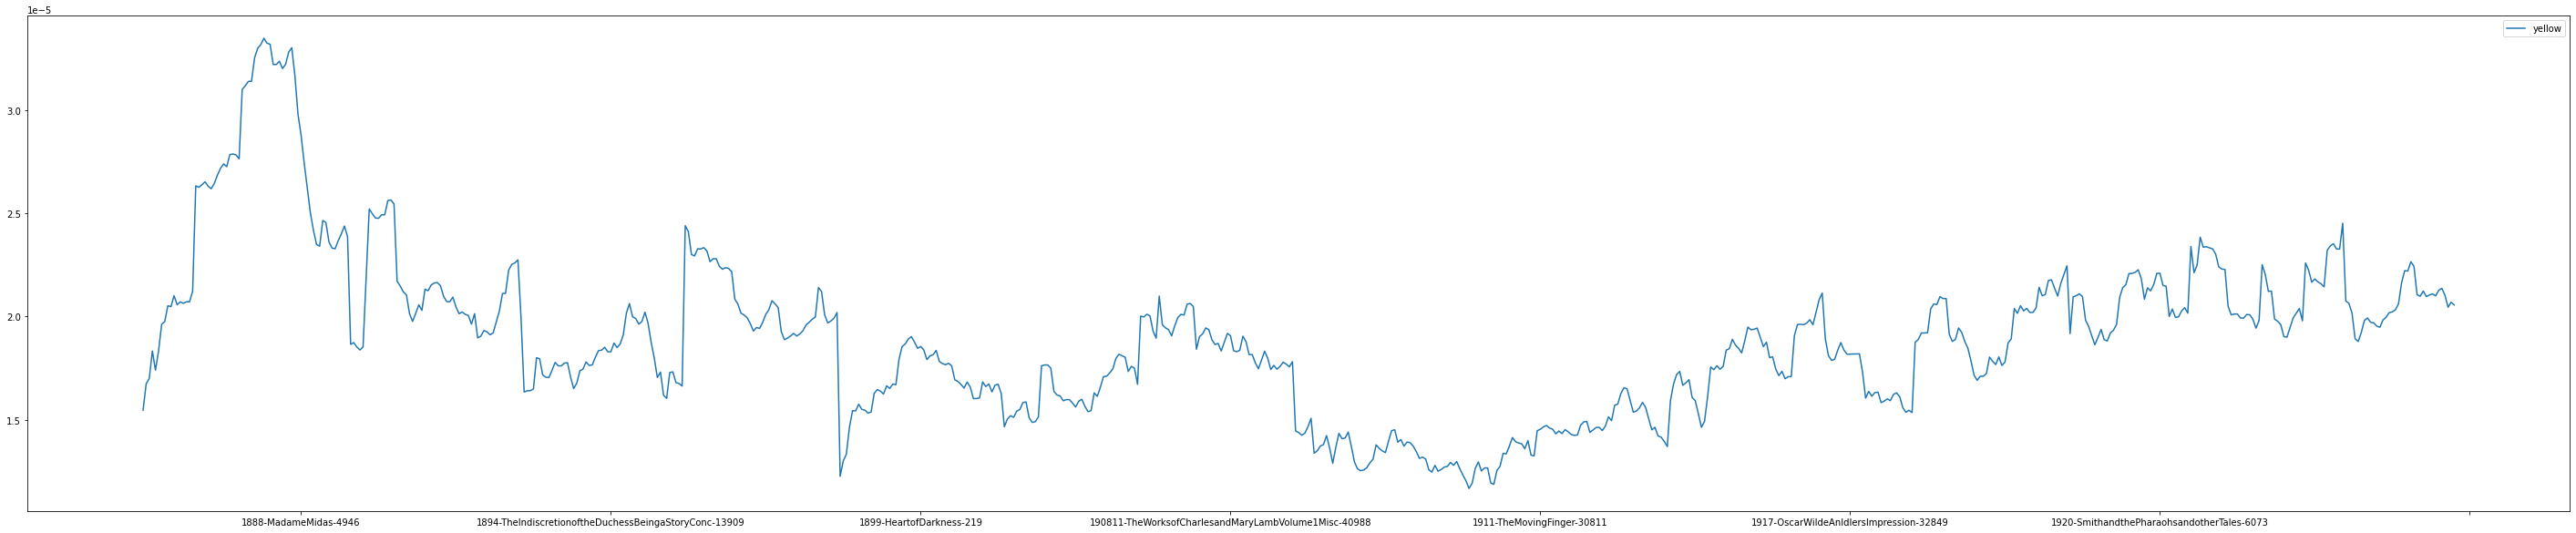

In [13]:
df.fillna(0)[['yellow']].rolling(50).mean().plot(figsize=(50, 10))

Yellow nineties? 

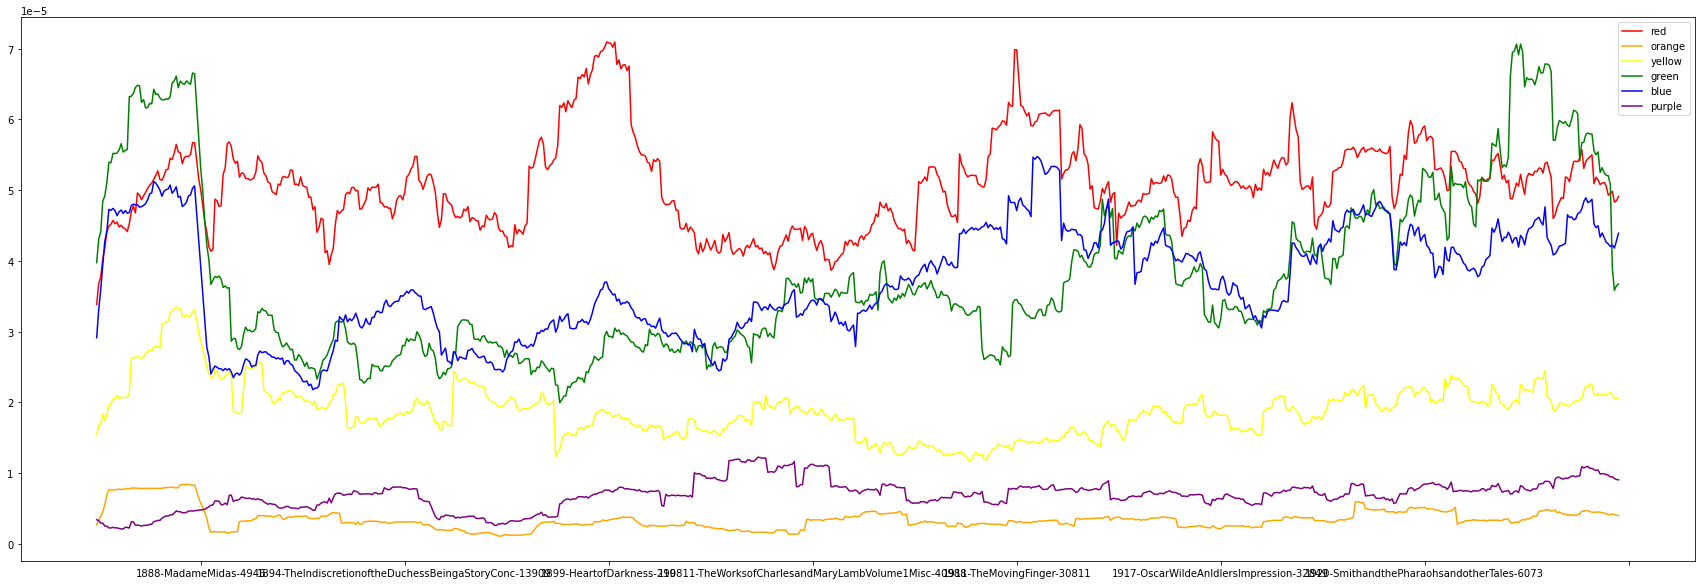

In [14]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
df.fillna(0)[colors].rolling(50).mean().plot(figsize=(30, 10), color=colors)

In [15]:
df['textName'] = df.index

In [16]:
dfMelted = df.melt(id_vars='textName')

In [17]:
dfMelted['year'] = dfMelted['textName'].apply(lambda x: int(x[:4]))

In [18]:
dfMelted

,textName,variable,value,year
0,1880-DoraThorne-2374,black,0.000012,1880
1,1880-GreeneFerneFarm-37046,black,0.000102,1880
2,1880-JezebelsDaughter-3633,black,0.000021,1880
3,1880-RoundAboutaGreatEstate-20528,black,0.000114,1880
4,1880-ShakespearesInsomniaandtheCausesThereof-1...,black,NaN,1880
...,...,...,...,...
357399,1925-TheVerseBookofaHomelyWoman-3477,yellow tan,NaN,1925
357400,192511-ModernBritishPoetry-26785,yellow tan,NaN,1925
357401,192711-OliverCromwellAPlay-17091,yellow tan,NaN,1927
357402,1928-BrowningsShorterPoems-16376,yellow tan,NaN,1928


In [19]:
fig = px.box(dfMelted, x="textName", y="value")
fig.write_html('out.html')

In [20]:
dfMelted

,textName,variable,value,year
0,1880-DoraThorne-2374,black,0.000012,1880
1,1880-GreeneFerneFarm-37046,black,0.000102,1880
2,1880-JezebelsDaughter-3633,black,0.000021,1880
3,1880-RoundAboutaGreatEstate-20528,black,0.000114,1880
4,1880-ShakespearesInsomniaandtheCausesThereof-1...,black,NaN,1880
...,...,...,...,...
357399,1925-TheVerseBookofaHomelyWoman-3477,yellow tan,NaN,1925
357400,192511-ModernBritishPoetry-26785,yellow tan,NaN,1925
357401,192711-OliverCromwellAPlay-17091,yellow tan,NaN,1927
357402,1928-BrowningsShorterPoems-16376,yellow tan,NaN,1928


In [21]:
df['id'] = df['textName'].apply(lambda x: x.split('-')[-1])

# Metadata Analysis

Which library of congress subject headings correlate with which colors? 

Which subject headings correlate with colorfulness? 

In [22]:
conn = sqlite3.connect('/home/jon/Corpora/pg-text-7.db')

In [23]:
c = conn.cursor()

In [24]:
c.fetchall()

[]

In [25]:
def getLCSH(bookId): 
    bookId = str(float(bookId))
    c.execute('select lcsh from meta where id=?;', [bookId])
    results = c.fetchall()
    return eval(results[0][0].replace('{', '[').replace('}', ']'))

In [26]:
df['lcsh'] = df['id'].apply(getLCSH)

In [27]:
df['id'] = df['textName'].apply(lambda x: x.split('-')[-1])

In [28]:
df['lcsh'] = df['id'].apply(getLCSH)

In [29]:
def guessGenre(lcshs): 
    for lcsh in lcshs: 
        lcsh = lcsh.lower()
        if 'poetry' in lcsh or 'poems' in lcsh: 
            return 'Poetry'
        elif 'fiction' in lcsh: 
            return 'Fiction'
        elif 'drama' in lcsh or 'play' in lcsh: 
            return 'Drama'
        elif 'children' in lcsh or 'juvenile' in lcsh: 
            return 'Juvenile'
        

In [30]:
df['genre'] = df['lcsh'].apply(guessGenre)

In [31]:
df['totals'] = df.sum(axis=1)

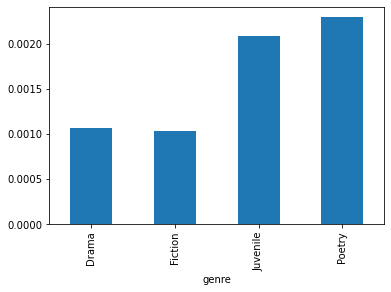

In [32]:
df.groupby('genre').mean()['totals'].plot(kind='bar')

In [33]:
df.groupby('genre').sum()

,black,midnight,dark,royal,chestnut,brown,crimson,forest,blue,russet,...,light salmon,sap green,muddy yellow,pastel blue,light lilac,very dark green,brown yellow,dusky rose,yellow tan,totals
genre,,,,,,,,,,,,,,,,,,,,,
Drama,0.001125,0.000183,0.001453,0.000351,0.000000,0.000147,0.000109,0.000147,0.000552,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.024524
Fiction,0.038714,0.004206,0.036499,0.005219,0.000692,0.013778,0.002506,0.007263,0.019032,0.000173,...,0.000002,0.000001,0.000002,0.000001,0.000001,9.199420e-07,9.199420e-07,0.000001,0.000002,0.606527
Juvenile,0.000238,0.000038,0.000182,0.000159,0.000000,0.000098,0.000090,0.000002,0.000195,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.006237
Poetry,0.004119,0.000595,0.006054,0.000956,0.000101,0.002220,0.000538,0.001001,0.006049,0.000068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.126044


In [34]:
allSubjects = []
for subjectList in df['lcsh']:
    for subject in subjectList:
        allSubjects.append(subject)

In [35]:
commonSubjects = [pair[0] for pair in Counter(allSubjects).most_common(20)]

In [36]:
def commonSubject(lcshs): 
    for lcsh in lcshs: 
        if lcsh in commonSubjects: 
            return lcsh

In [37]:
df['commonSubject'] = df['lcsh'].apply(commonSubject)

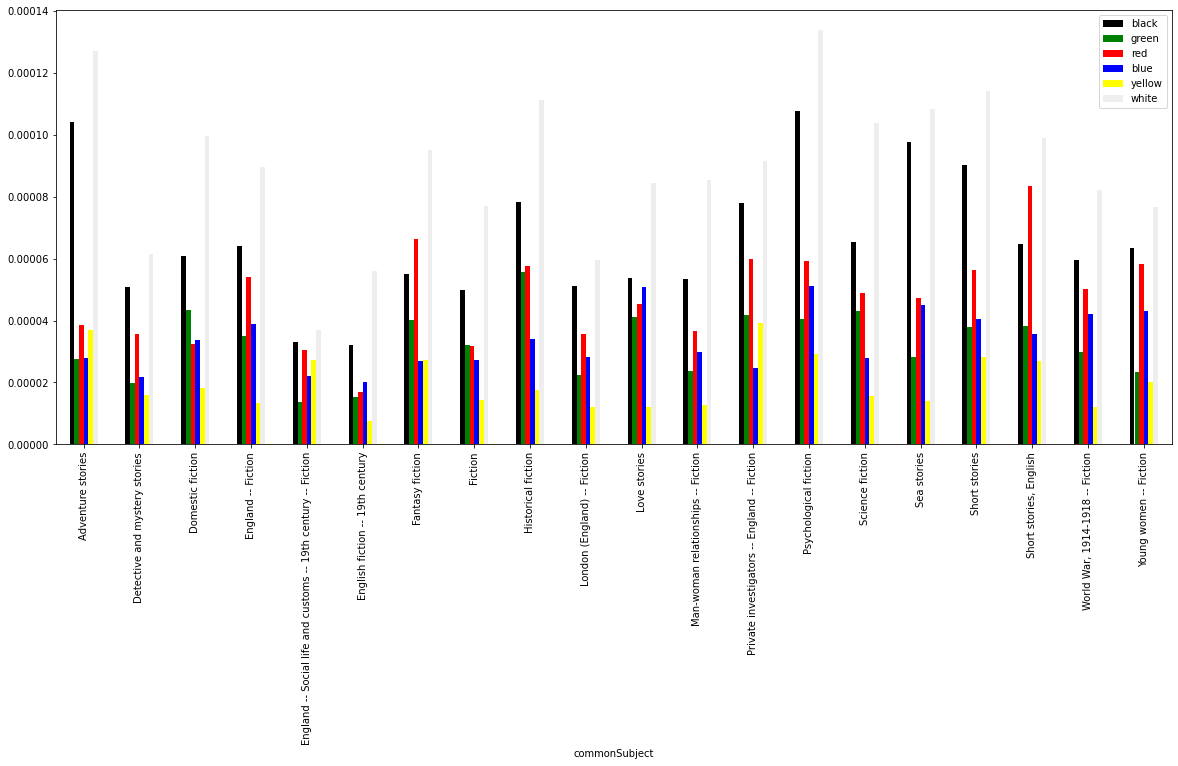

In [38]:
df.groupby('commonSubject').mean()[['black', 'green', 'red', 'blue', 'yellow', 'white']].plot(kind='bar', color=['black', 'green', 'red', 'blue', 'yellow', '#eeeeee'], figsize=(20,8))

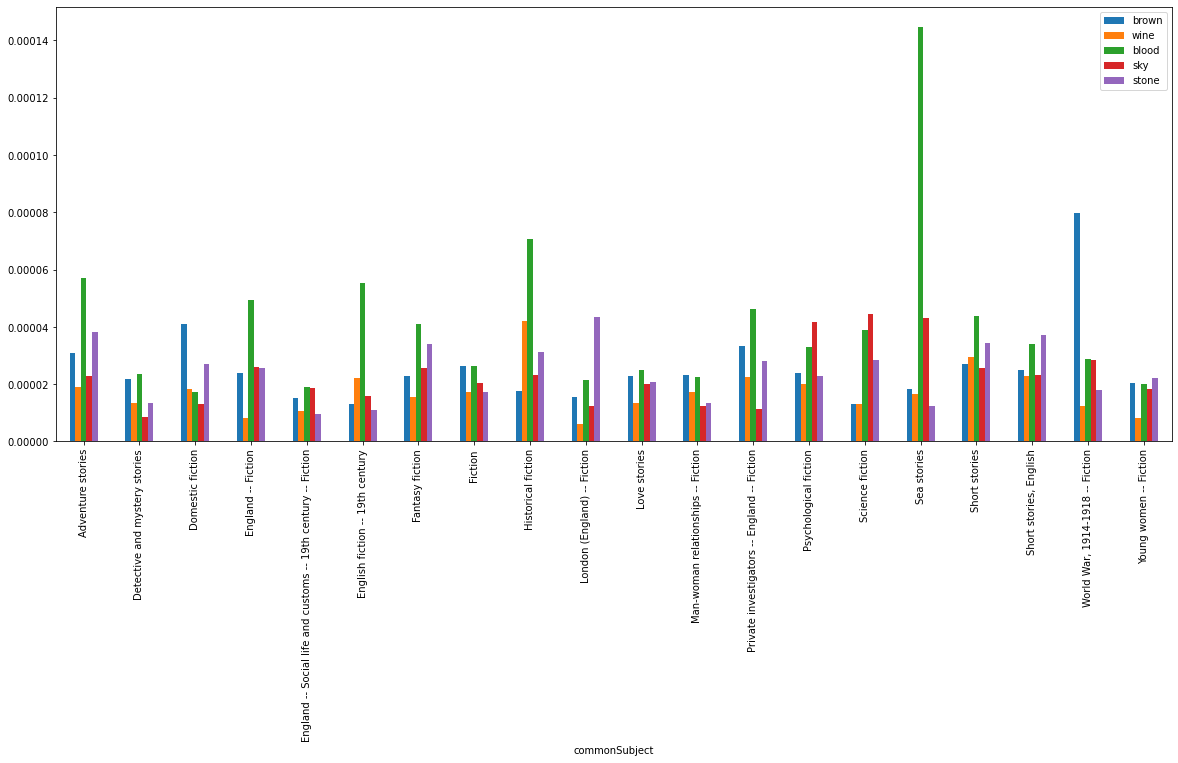

In [39]:
df.groupby('commonSubject').mean()[['brown', 'wine', 'blood', 'sky', 'stone']].plot(kind='bar', figsize=(20,8))

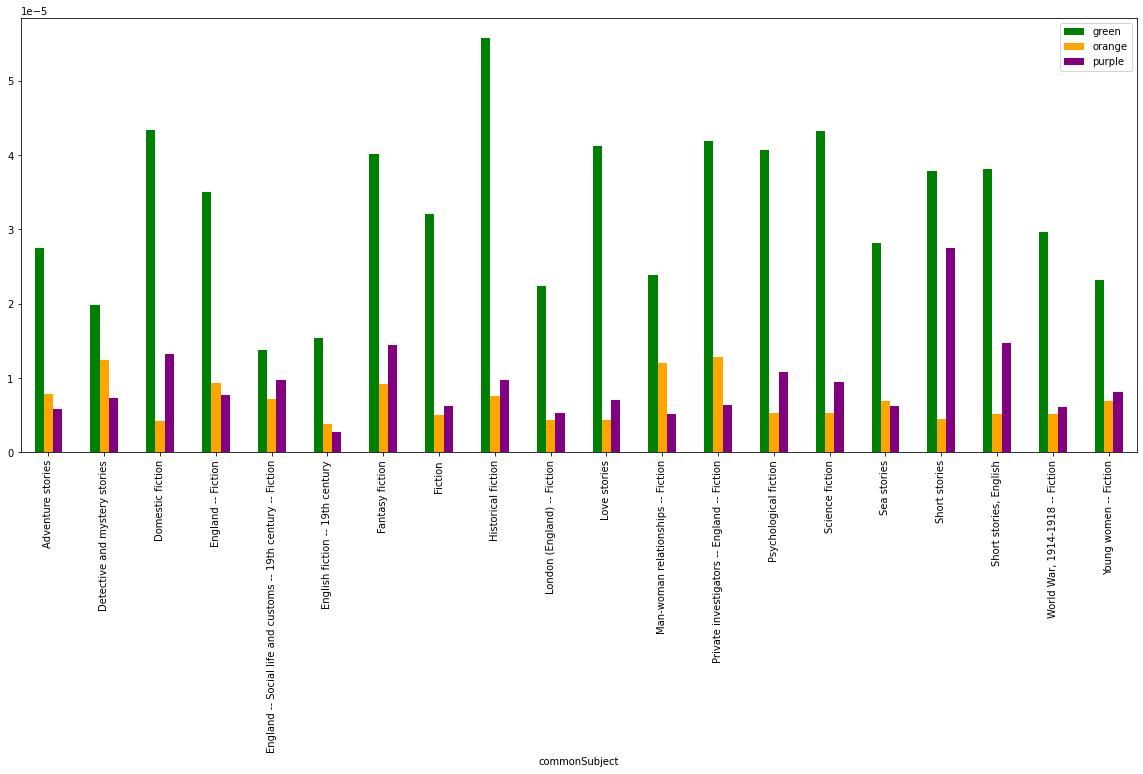

In [40]:
df.groupby('commonSubject').mean()[['green', 'orange', 'purple']].plot(kind='bar', color=['green', 'orange', 'purple'], figsize=(20,8))

In [41]:
stds = df.groupby('commonSubject').mean().std()

In [42]:
df.groupby('commonSubject').mean() 

,black,midnight,dark,royal,chestnut,brown,crimson,forest,blue,russet,...,light salmon,sap green,muddy yellow,pastel blue,light lilac,very dark green,brown yellow,dusky rose,yellow tan,totals
commonSubject,,,,,,,,,,,,,,,,,,,,,
Adventure stories,0.000104,0.000009,0.000078,0.000020,0.000003,0.000031,0.000006,0.000032,0.000028,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001129
Detective and mystery stories,0.000051,0.000013,0.000057,0.000008,0.000004,0.000022,0.000004,0.000006,0.000022,0.000004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000755
Domestic fiction,0.000061,0.000011,0.000049,0.000006,0.000006,0.000041,0.000011,0.000006,0.000034,NaN,...,NaN,NaN,NaN,NaN,NaN,9.199420e-07,9.199420e-07,NaN,NaN,0.000981
England -- Fiction,0.000064,0.000013,0.000059,0.000010,0.000004,0.000024,0.000010,0.000006,0.000039,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001082
England -- Social life and customs -- 19th century -- Fiction,0.000033,0.000009,0.000048,0.000008,0.000004,0.000015,0.000014,0.000001,0.000022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000610
English fiction -- 19th century,0.000032,0.000009,0.000037,0.000006,0.000002,0.000013,0.000004,0.000006,0.000020,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,0.000636
Fantasy fiction,0.000055,0.000010,0.000061,0.000015,0.000004,0.000023,0.000008,0.000015,0.000027,0.000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001160
Fiction,0.000050,0.000006,0.000056,0.000015,0.000006,0.000026,0.000006,0.000009,0.000027,0.000004,...,NaN,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000882
Historical fiction,0.000078,0.000008,0.000062,0.000017,0.000004,0.000018,0.000005,0.000071,0.000034,0.000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001203


In [43]:
stds

black              0.000021
midnight           0.000003
dark               0.000016
royal              0.000007
chestnut           0.000001
                     ...   
very dark green         NaN
brown yellow            NaN
dusky rose              NaN
yellow tan              NaN
totals             0.000243
Length: 450, dtype: float64

In [44]:
means = df.groupby('commonSubject').mean().mean()

In [45]:
bySubject = df.groupby('commonSubject').mean()

In [46]:
positiveOutliers = bySubject[bySubject > (means + stds*2)]
positiveOutliers

,black,midnight,dark,royal,chestnut,brown,crimson,forest,blue,russet,...,light salmon,sap green,muddy yellow,pastel blue,light lilac,very dark green,brown yellow,dusky rose,yellow tan,totals
commonSubject,,,,,,,,,,,,,,,,,,,,,
Adventure stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detective and mystery stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Social life and customs -- 19th century -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,0.000014,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
English fiction -- 19th century,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fantasy fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Historical fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000071,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
negativeOutliers = bySubject[bySubject < (means - stds*1.5)]
baseColors = ['black', 'grey', 'brown', 'blue', 'purple', 'red', 'orange', 'green', 'yellow', 'white']
negativeOutliers[baseColors]

,black,grey,brown,blue,purple,red,orange,green,yellow,white
commonSubject,,,,,,,,,,
Adventure stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detective and mystery stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Social life and customs -- 19th century -- Fiction,0.000033,NaN,NaN,NaN,NaN,NaN,NaN,0.000014,NaN,0.000037
English fiction -- 19th century,0.000032,0.000013,NaN,NaN,NaN,0.000017,NaN,0.000015,NaN,NaN
Fantasy fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Historical fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
positiveOutliers[baseColors]

,black,grey,brown,blue,purple,red,orange,green,yellow,white
commonSubject,,,,,,,,,,
Adventure stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detective and mystery stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic fiction,NaN,0.000073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England -- Social life and customs -- 19th century -- Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
English fiction -- 19th century,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fantasy fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Historical fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000056,NaN,NaN


In [49]:
df[df['commonSubject'] == 'England -- Social life and customs -- 19th century -- Fiction']['textName']

1881-AyalasAngel-33500                                                            1881-AyalasAngel-33500
1881-TheBlackRobe-1587                                                            1881-TheBlackRobe-1587
1883-HeartandScienceAStoryofthePresentTime-7892          1883-HeartandScienceAStoryofthePresentTime-7892
1883-TheUnclassed-4305                                                            1883-TheUnclassed-4305
1885-ThePayingGuest-4298                                                        1885-ThePayingGuest-4298
1886-APhantomLover-8180                                                          1886-APhantomLover-8180
1886-TheEvilGeniusADomesticStory-1627                              1886-TheEvilGeniusADomesticStory-1627
1886-TheGuiltyRiver-3634                                                        1886-TheGuiltyRiver-3634
1887-Thyrza-4302                                                                        1887-Thyrza-4302
1888-WessexTales-3056                                  

In [50]:
plt.style.use('ggplot')

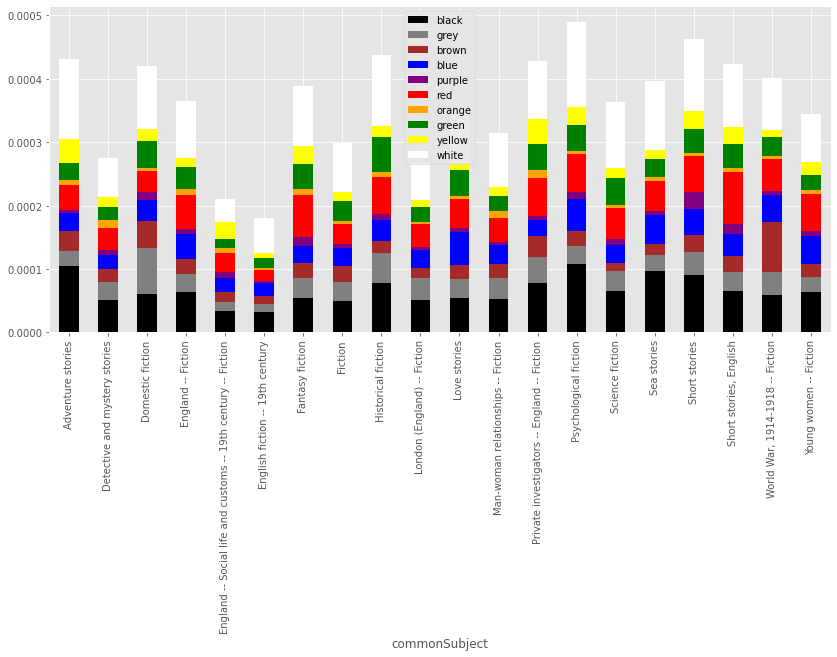

In [51]:
bySubject[baseColors].plot(kind='bar', stacked=True, color=baseColors,figsize=(14,6))

Define colorfulness as the number of color colums which are not NAN. 

In [52]:
bySubject.notna().sum(axis=1).sort_values(ascending=False)

commonSubject
Fiction                                                          265
Love stories                                                     264
Short stories, English                                           215
Psychological fiction                                            206
Detective and mystery stories                                    206
London (England) -- Fiction                                      203
Adventure stories                                                203
England -- Fiction                                               196
World War, 1914-1918 -- Fiction                                  193
Domestic fiction                                                 192
Short stories                                                    187
Man-woman relationships -- Fiction                               185
Science fiction                                                  180
Fantasy fiction                                                  176
Historical fiction  

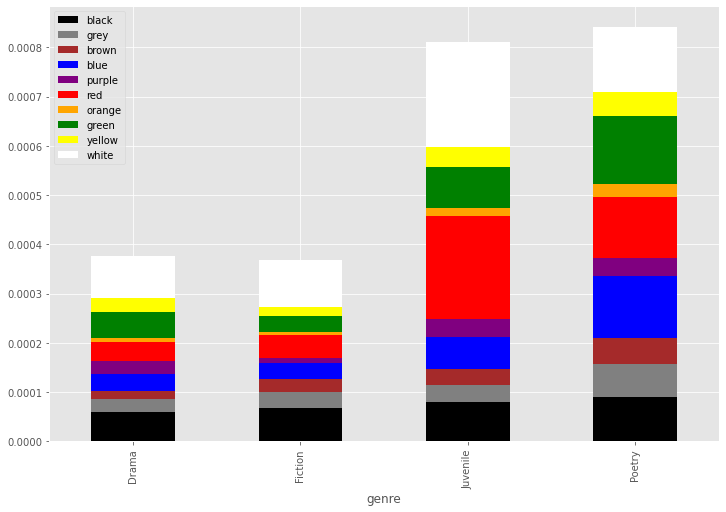

In [53]:
df.groupby('genre').mean()[baseColors].plot(kind='bar', stacked=True, color=baseColors, figsize=(12,8))

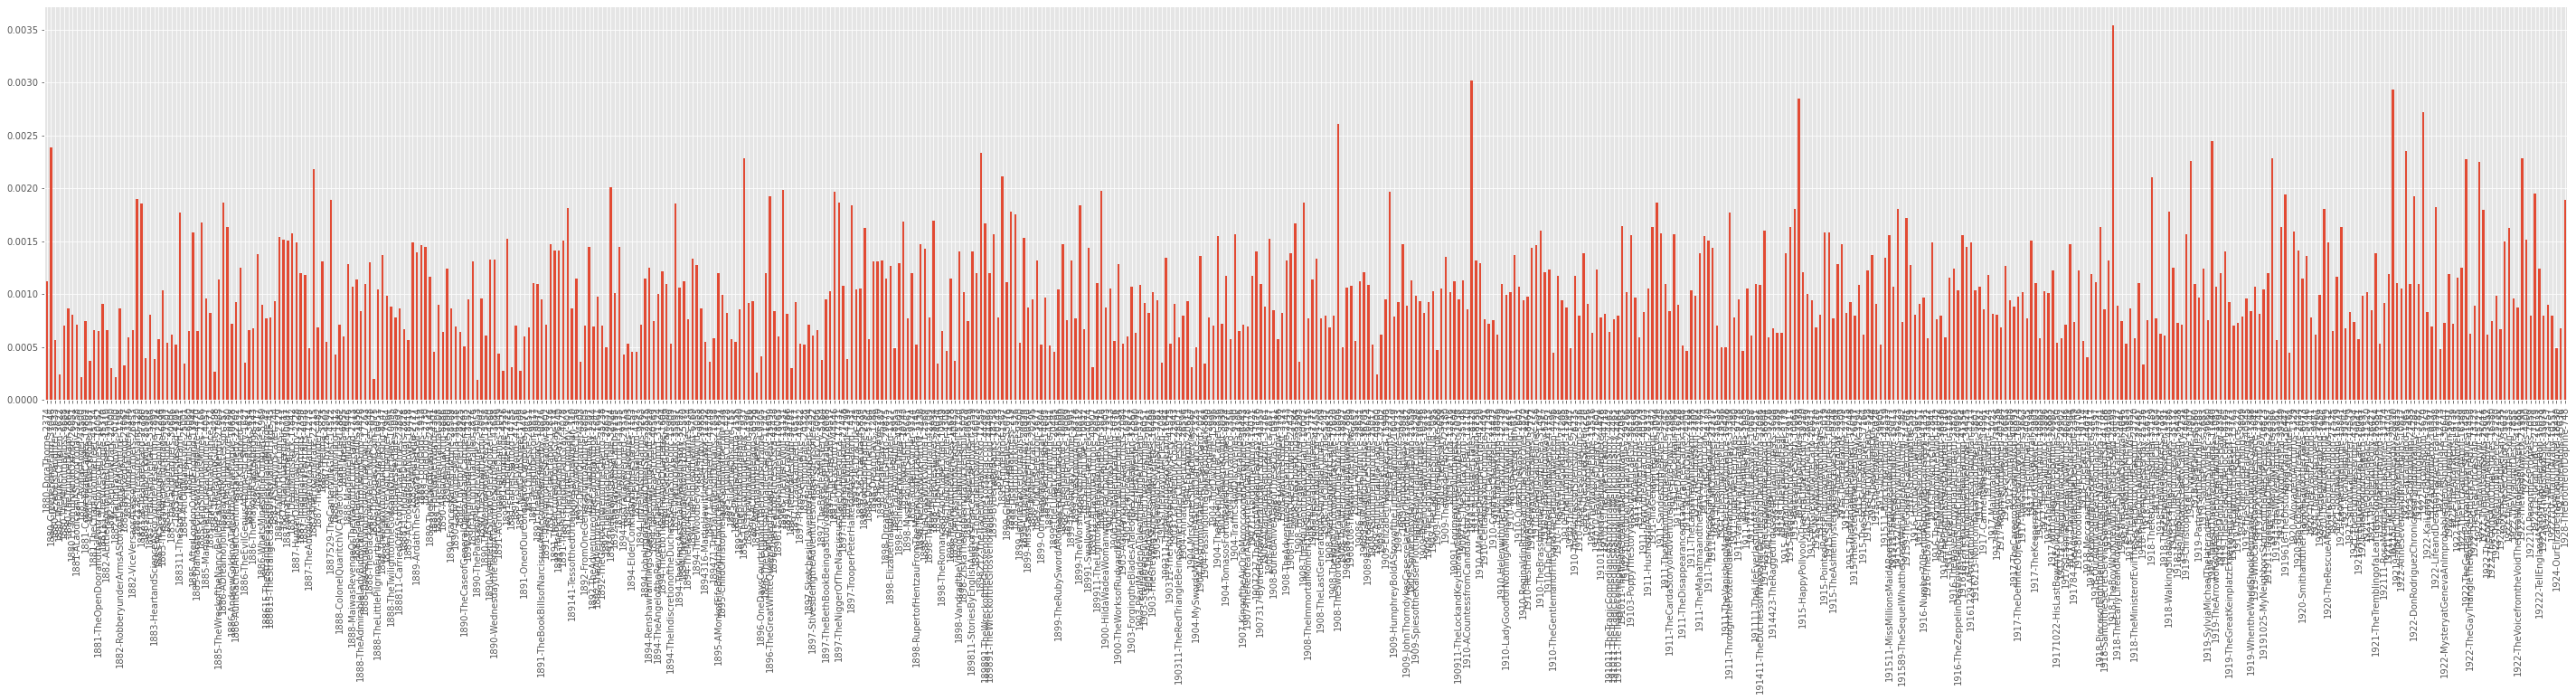

In [54]:
df[df['genre'] == 'Fiction']['totals'].plot(kind='bar', figsize=(50,8))

In [55]:
fictionTotals = df[df['genre'] == 'Fiction']['totals']

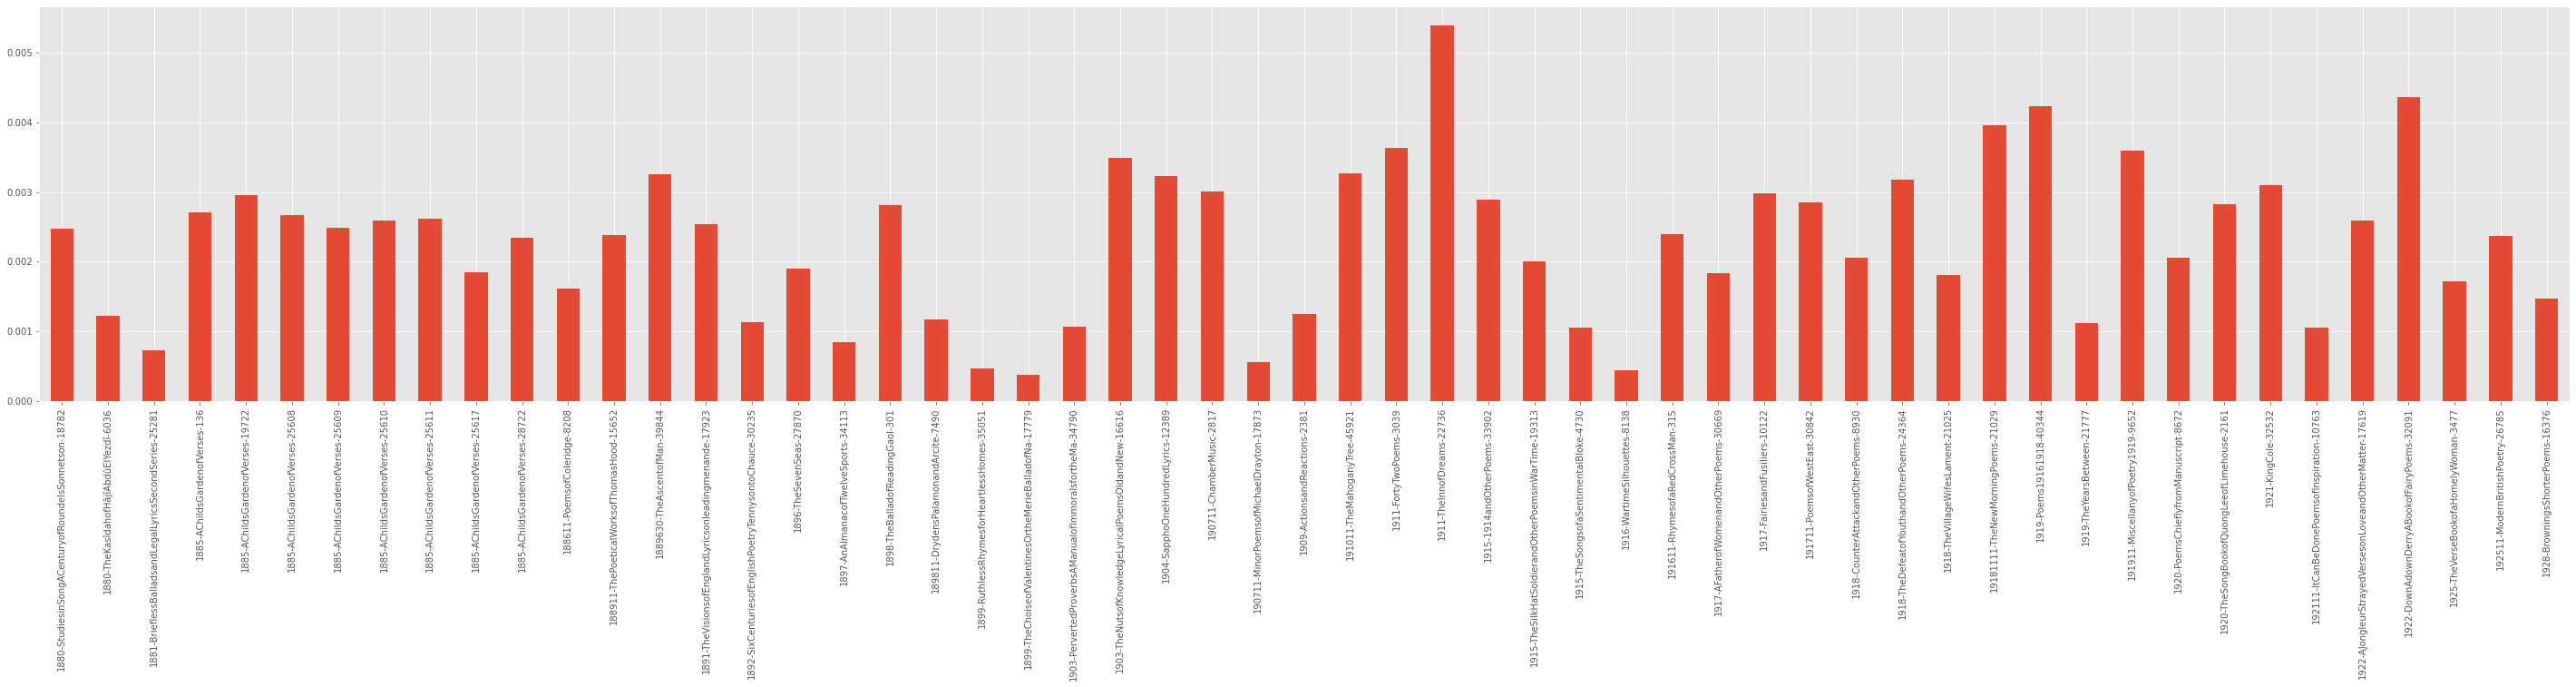

In [56]:
df[df['genre'] == 'Poetry']['totals'].plot(kind='bar', figsize=(50,8))

In [57]:
df['year'] = df['textName'].str[:4]
df['year'] = df['year'].apply(int)
df['totals'] = df['totals'].apply(float)

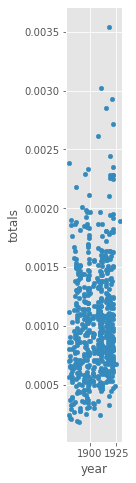

In [58]:
df[df['genre'] == 'Fiction'].plot(kind='scatter', x='year', y='totals', figsize=(1,8))

In [59]:
sns.set(rc={'figure.figsize':(16,8)})


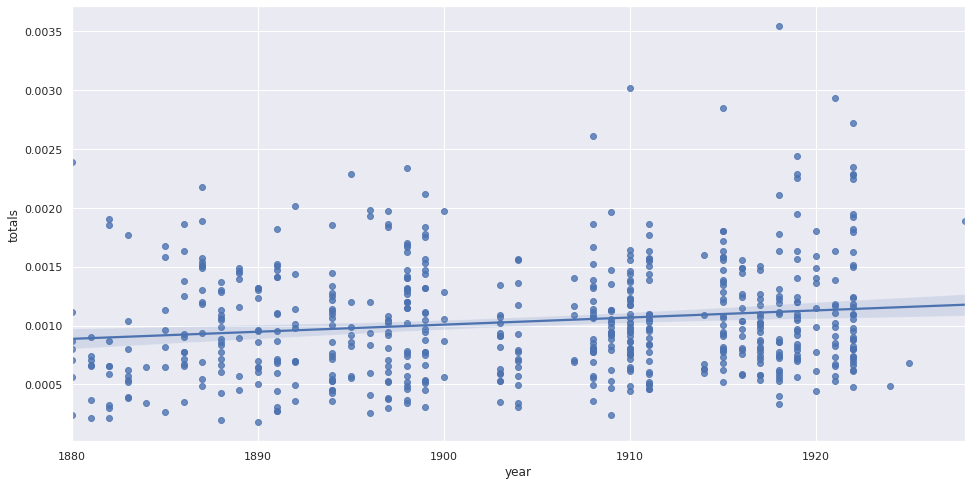

In [60]:
sns.regplot(x='year', y='totals', data=df[df['genre']=='Fiction'])

In [61]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

# regress "expression" onto "motifScore" (plus an intercept)
model = sm.OLS(l.expression, sm.add_constant(motif.motifScore))

# scatter-plot data
ax = motif.plot(x='motifScore', y='expression', kind='scatter')

# plot regression line
abline_plot(model_results=model.fit(), ax=ax)

NameError: name 'l' is not defined

In [ ]:
df[df['genre'] == 'Fiction'][baseColors].plot(kind='box', figsize=(16,8))

In [ ]:
fiction = df[df['genre'] == 'Fiction']

In [ ]:
df['totals'].std() 

## Fiction outliers 

In [ ]:
fictionPositiveOutliers = fiction['totals'][fiction['totals'] > fiction['totals'].mean() + fiction['totals'].std() * 2]

Most of these are post 1910. 

In [ ]:
fictionPosOutliersDf = pd.DataFrame(fictionPositiveOutliers)

In [ ]:
fictionPosOutliersDf['name'] = fictionPosOutliersDf.index

In [ ]:
def getAuthor(textName):
    textId = textName.split('-')[-1]
    c.execute('select author from meta where id=?', [str(float(textId))])
    return c.fetchone()[0]

In [ ]:
[getAuthor(item) for item, val in fictionPositiveOutliers.items()]

In [ ]:
fictionPosOutliersDf['Author'] = fictionPosOutliersDf['name'].apply(getAuthor)

In [ ]:
export = fictionPosOutliersDf.sort_values(by='totals', ascending=False)[['Author', 'totals']]

In [ ]:
export.to_html('fiction-positive-outliers-table.html')